### **MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.**

### **MNIST is short for Modified National Institute of Standards and Technology database.It contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.The dataset is already divided into training and testing sets.**

### **Kaggle JSON path**

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/'

### **API from kaggle**

In [2]:
!kaggle datasets download -d saijananim/ibm-mnist-dataset-new

 72% 11.0M/15.2M [00:00<00:00, 53.3MB/s]
100% 15.2M/15.2M [00:00<00:00, 66.8MB/s]


### **Importing the libraries**

In [29]:
import pandas as pd
import numpy as np
from keras import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
%matplotlib inline
from keras.datasets import mnist    
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils
import random 

### **Loading the dataset from keras**

In [5]:
df=mnist.load_data()

In [6]:
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### **Training and Testing Datasets**

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


### **Determining the Shape of the dataset**

In [20]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


### **Showing the Sample Images**

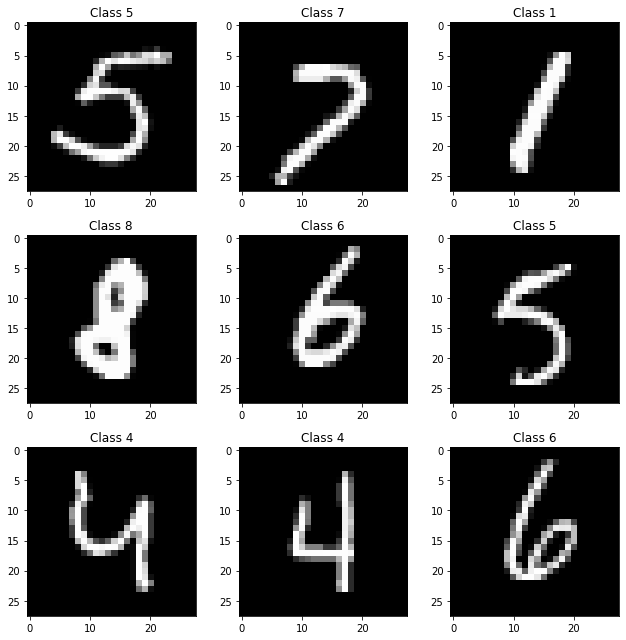

In [35]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

### **Printing the matrix**

In [31]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

   
matprint(X_train[num])

0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0    0   11   51  113  193  193   51    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0    0   41  213  252  253  252  253  192    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0    0  113  253  224  122   41   82  254  253   82   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0   41  233  212   20    0    0    0  172  252  203   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0   0  102  2

The label value is  [7 2 1 ... 4 5 6]


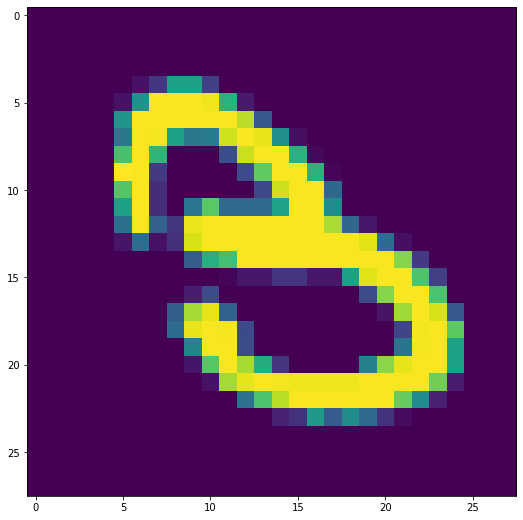

In [32]:
print("The label value is ",y_test)
plt.imshow(X_test[18])

The label value is  [7 2 1 ... 4 5 6]


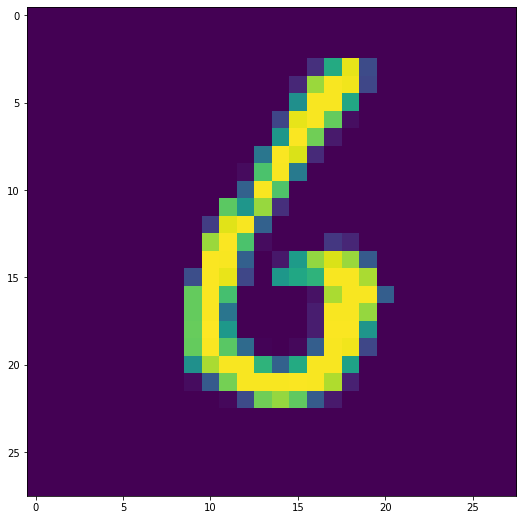

In [34]:
print("The label value is ",y_test)
plt.imshow(X_test[50])